# Bayes - Ensamble

En este notebook trataremos de entrenar 3 modelos de Naive Bayes. 1 Con las variables categóricas, otro con las variables discretas y otro con las variables continuas y hacerlos votar. 

#### Bibliotecas

In [1]:
# Modelo
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.naive_bayes import BernoulliNB, ComplementNB

# Preprocessing
import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

# Otros
import pandas as pd
import numpy as np

In [2]:
df = utils.feature_engineering(utils.get_data())

In [3]:
def discretas(X):
    return X[['anios_estudiados', 'edad', 'horas_trabajo_registradas']]

def continuas(X):
    return X[['ganancia_perdida_declarada_bolsa_argentina']]

def categoricas(X):
    return X[X.columns.drop(['edad',
                             'horas_trabajo_registradas',
                             'anios_estudiados',
                             'ganancia_perdida_declarada_bolsa_argentina'])]

In [4]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X_disc = discretas(X)
X_cont = continuas(X)
X_cat = categoricas(X)

Y = df['tiene_alto_valor_adquisitivo']


# Es importante que el random_state sea el mismo, en caso contrario podría darse un leak. 
X_train_disc, X_test_disc, y_train, y_test = train_test_split(X_disc, Y, random_state=27)
X_train_cont, X_test_cont, y_train, y_test = train_test_split(X_cont, Y, random_state=27)
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, Y, random_state=27)

### Manejo de las categóricas

Para ello será necesario encodearlas de 0 a n-1, n: cantidad de categorías disponibles.

In [5]:
orEnc = OrdinalEncoder()
X_train_cat = pd.DataFrame(orEnc.fit_transform(X_train_cat)).set_axis(X_train_cat.columns, axis=1).add_prefix('$')
X_test_cat = pd.DataFrame(orEnc.transform(X_test_cat)).set_axis(X_train_cat.columns, axis=1).add_prefix('$')

##### Entrenando el modelo

In [6]:
clf_cat = CategoricalNB()
clf_cat.fit(X_train_cat, y_train)

CategoricalNB()

In [8]:
print(classification_report(y_test,clf_cat.predict(X_test_cat)))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      6186
           1       0.50      0.75      0.60      1955

    accuracy                           0.76      8141
   macro avg       0.71      0.76      0.72      8141
weighted avg       0.81      0.76      0.78      8141



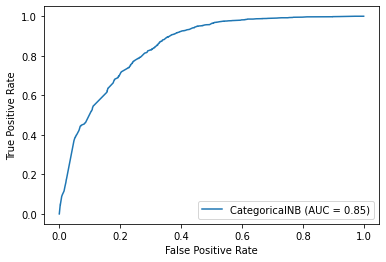

In [7]:
plot_roc_curve(clf_cat, X_test_cat, y_test)

### Clasificación sobre discretas

In [59]:
clf_dis = MultinomialNB()
clf_dis.fit(X_train_disc, y_train)

MultinomialNB()

In [61]:
print(classification_report(y_train, clf_dis.predict(X_train_disc)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     18534
           1       0.00      0.00      0.00      5886

    accuracy                           0.76     24420
   macro avg       0.38      0.50      0.43     24420
weighted avg       0.58      0.76      0.65     24420



/home/lukas/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No sirve para nada.

### Única continua

In [9]:
clf_con = GaussianNB()
clf_con.fit(X_train_cont, y_train)

GaussianNB()

In [10]:
print(classification_report(y_test, clf_con.predict(X_test_cont)))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6186
           1       0.75      0.22      0.34      1955

    accuracy                           0.79      8141
   macro avg       0.77      0.60      0.61      8141
weighted avg       0.79      0.79      0.75      8141



Única decente...

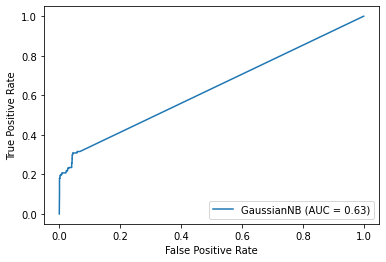

In [11]:
plot_roc_curve(clf_con, X_test_cont, y_test)